# Stocks Market Analysis

This is a sketch of the analysis process of the stock market.

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import alpaca_trade_api as alpaca

api = alpaca.REST('', '', 'https://paper-api.alpaca.markets')

def moving_average(arr, width, n):
    value = 0
    if width > n: width = n
    if width == 0: width = 1
    for i in range(width): value += arr[n - i] / width
    return value

def is_increasing(arr, n):
    if n > 0:
        if arr[n] > arr[n-1]: return True
    return False
        
    

In [294]:
barset = api.get_barset('AAPL', 'day', start=pd.Timestamp(year=2020, month=2, day=20).isoformat(), end=pd.Timestamp(year=2020, month=3, day=20).isoformat())
stocks = {
    'o': [],
    'c': [],
    'h': [],
    'l': [],
    'v': [],
    't': []
}
for bar in barset['AAPL']:
    stocks['o'].append(bar.o)
    stocks['c'].append(bar.c)
    stocks['h'].append(bar.h)
    stocks['l'].append(bar.l)
    stocks['v'].append(bar.v)
    stocks['t'].append(bar.t)

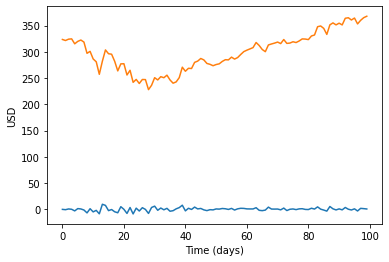

In [295]:
t = np.arange(0, len(stocks['o']), 1)

deltas = []
prev = stocks['o'][0]
for stock in stocks['o']:
    deltas.append((stock - prev) * 100 / prev)
    prev = stock

plt.xlabel('Time (days)')
plt.ylabel('USD')
plt.plot(t, deltas)
plt.plot(t, stocks['o'])
plt.show()

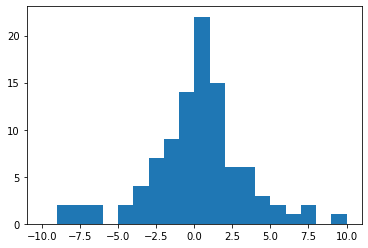

In [281]:
plt.hist(deltas, bins=20, range=(-10, 10))
plt.show()

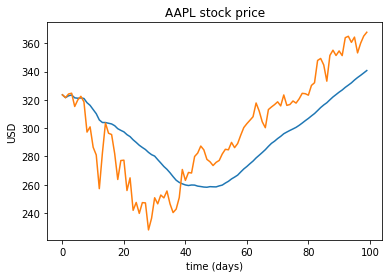

In [282]:
avgs = []
for i in range(len(stocks['o'])): avgs.append(moving_average(stocks['o'], 30, i))
plt.title('AAPL stock price')
plt.xlabel('time (days)')
plt.ylabel('USD')
plt.plot(t, avgs)
plt.plot(t, stocks['o'])
plt.savefig('aapl.png', figsize=(8, 6), dpi=200)
plt.show()

## Moving Average

In this kind of analysis, we evaluate the moving average price of the stock and predict if it is going up or down.

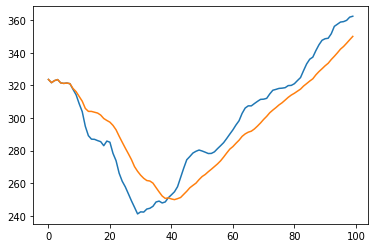

In [283]:
avgs = [[], []]
for i in range(len(stocks['o'])):
    avgs[0].append(moving_average(stocks['o'], 7, i))
    avgs[1].append(moving_average(stocks['o'], 21, i))
plt.plot(t, avgs[0])
plt.plot(t, avgs[1])
plt.savefig('mv_avg_aapl.png', dpi=300, figsize=(8, 6))
plt.show()

In [284]:
uncertainty = 1

balance = 100000
amount = 0

for i in range(len(stocks['o'])):
    price = stocks['o'][i]
    if abs(avgs[0][i] - avgs[1][i]) <= uncertainty:
        if is_increasing(avgs[0], i) and is_increasing(avgs[1], i):
            if balance >= price:
                balance -= price
                amount += 1
        if is_increasing(avgs[0], i) == False and is_increasing(avgs[1], i) == False:
            if amount > 0:
                amount -= 1
                balance += price
print('Money:\t{}\nAAPL\t{}'.format(balance, amount))
print('Equity:\t{}'.format(balance + amount * stocks['o'][-1]))

Money:	99711.69999999998
AAPL	1
Equity:	100079.54999999999


In [314]:
print(api.alpha_vantage.historic_quotes('AAPL', adjusted=True, output_format='pandas'))

            1. open   2. high  3. low  4. close  5. adjusted close  \
date                                                                 
2020-07-02   367.85  370.4700  363.64    364.11           364.1100   
2020-07-01   365.12  367.3600  363.91    364.11           364.1100   
2020-06-30   360.08  365.9800  360.00    364.80           364.8000   
2020-06-29   353.25  362.1736  351.28    361.78           361.7800   
2020-06-26   364.41  365.3200  353.02    353.63           353.6300   
...             ...       ...     ...       ...                ...   
2000-07-10    54.09   58.2500   53.75     57.13             3.5324   
2000-07-07    52.59   54.8100   52.13     54.44             3.3661   
2000-07-06    52.50   52.9400   49.63     51.81             3.2034   
2000-07-05    53.25   55.1900   50.75     51.63             3.1923   
2000-07-03    52.13   54.3100   52.13     53.31             3.2962   

             6. volume  7. dividend amount  8. split coefficient  
date                  